In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:

# Step 1: Load the data
df = pd.read_csv('portugal_listinigs2.csv')

y = df['Price']
X = df.drop(columns=['Price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  
)


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\1599133729.py:2: DtypeWarning: Columns (6,8,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('portugal_listinigs2.csv')


Visualization

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\1933049179.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=X_train, ax=axes[i], palette='Set2')
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\1933049179.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=X_train, ax=axes[i], palette='Set2')
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\1933049179.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=X_train, ax=axes[i], palette='Set2')
C:\Users\PMYLS\AppData\Local\Temp\ipykernel

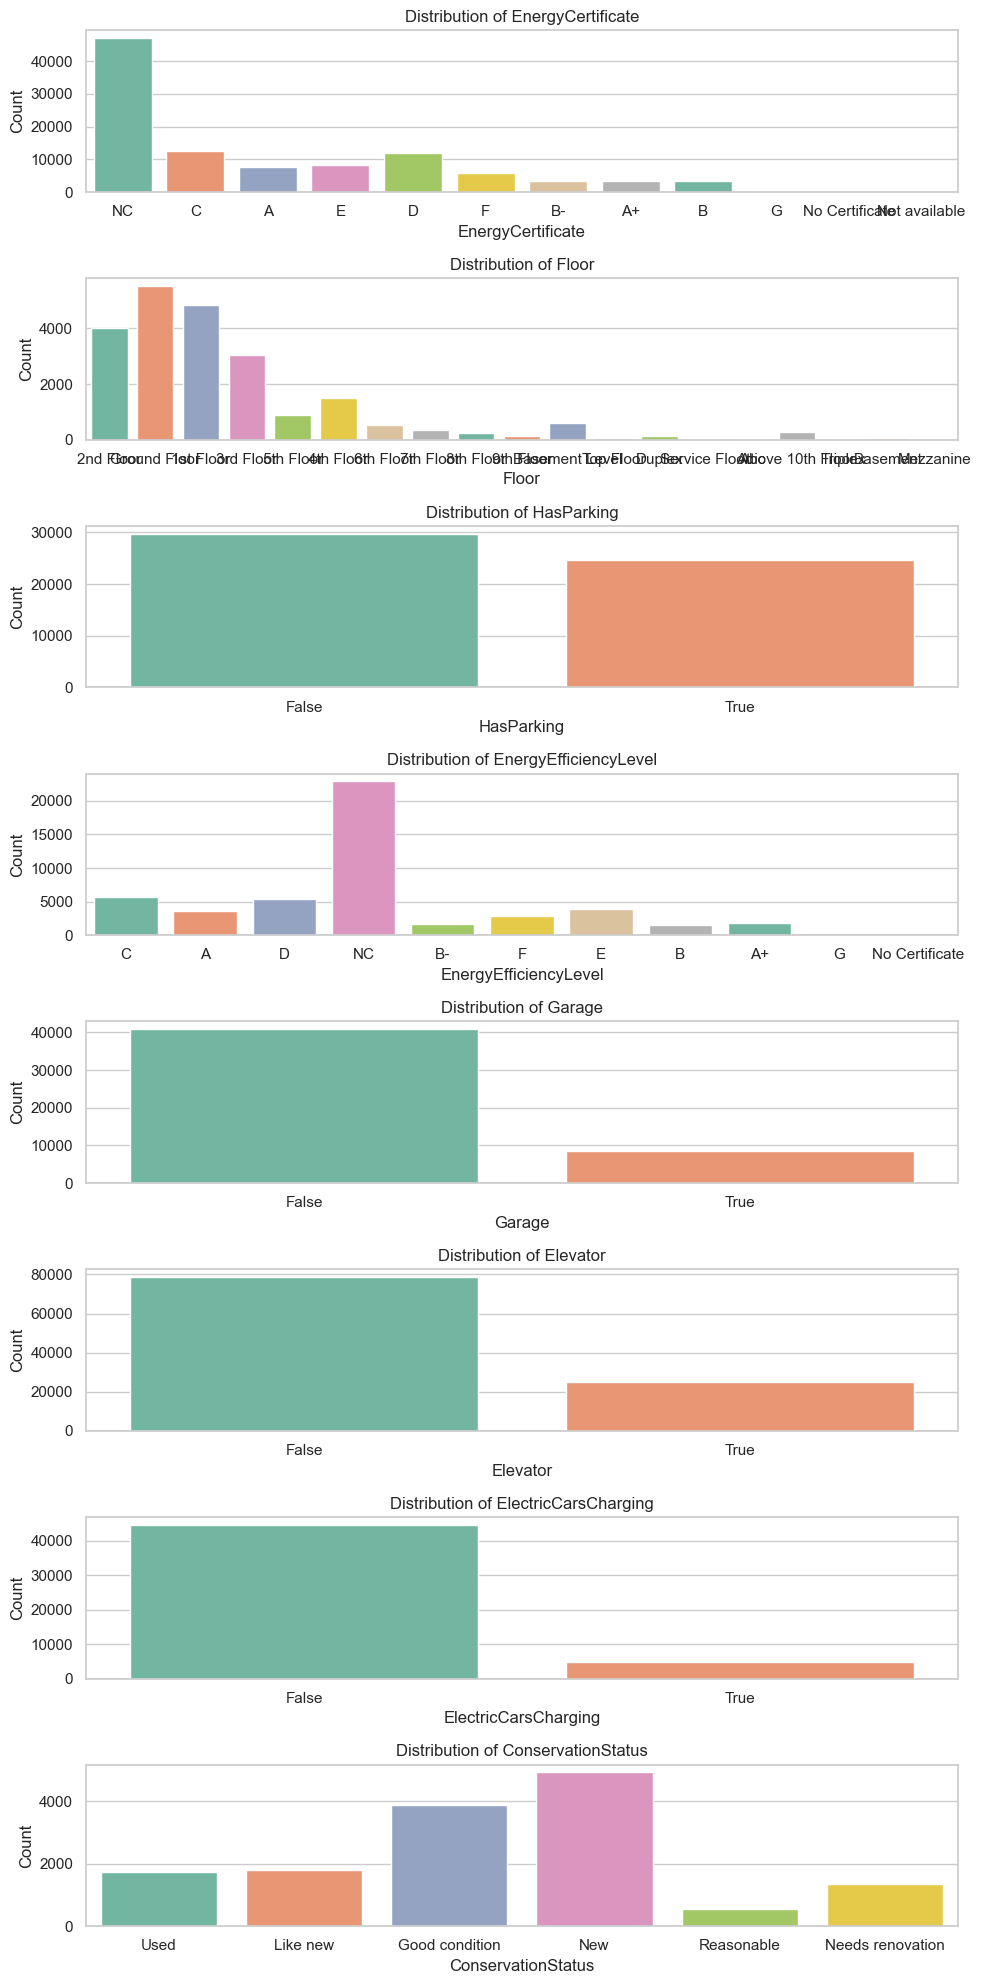

In [5]:
categorical_columns = ['EnergyCertificate', 'Floor', 'HasParking', 'EnergyEfficiencyLevel', 'Garage', 'Elevator','ElectricCarsCharging', 'ConservationStatus']

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Set the plot style
sns.set(style="whitegrid")

# Create subplots to display multiple bar charts
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 20))

# Plot bar charts for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=X_train, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


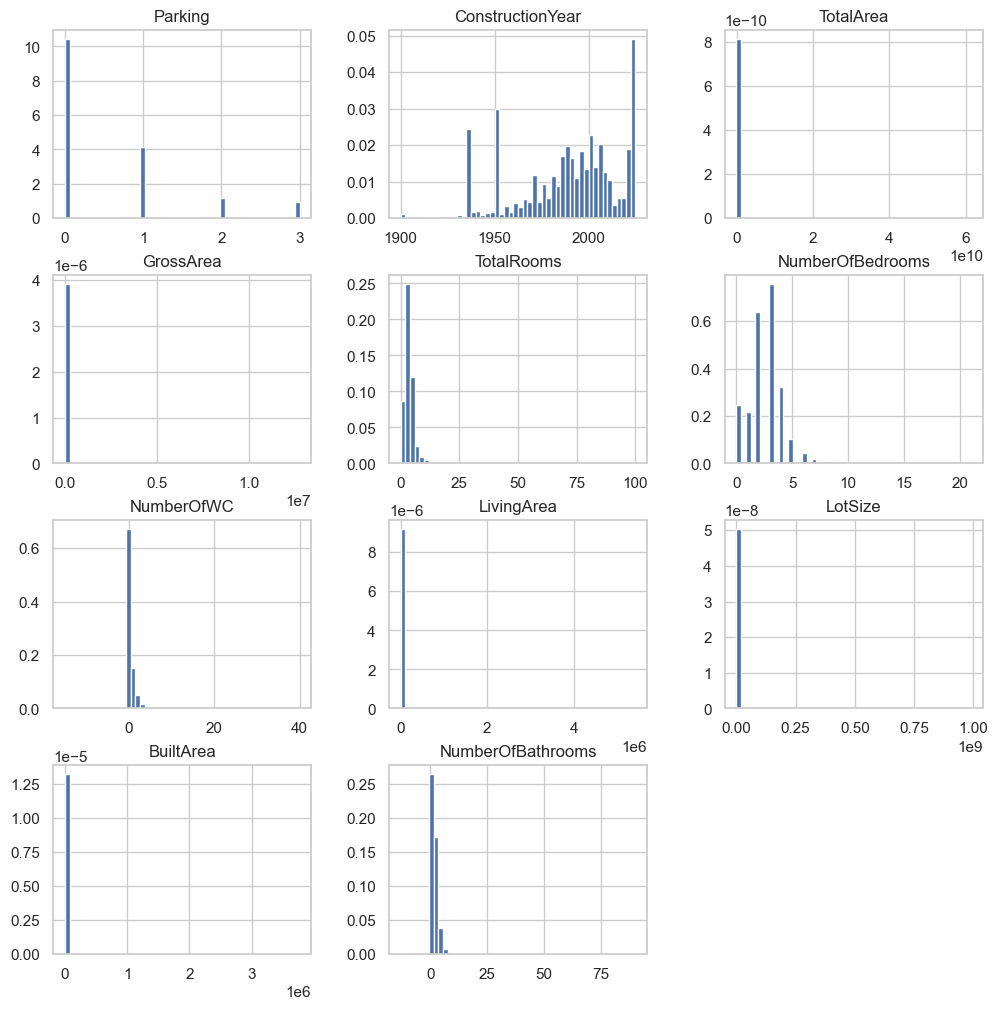

In [6]:
from matplotlib import pyplot as plt


X_train.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

Feature Selection

In [7]:
df_cleaned = df[['Parking', 'HasParking']].dropna()
correlation = df_cleaned['Parking'].corr(df_cleaned['HasParking'])
print(f"Correlation between Parking and HasParking: {correlation}")

#remove HasParking because it contains more missing values

Correlation between Parking and HasParking: 0.8516499355468609


In [8]:
#remove HasParking because it contains more missing values
X_train = X_train.drop(columns=['HasParking']) 

Handling Missing Values

In [9]:
missing_percentages = X_train.isnull().mean()*100 

print(missing_percentages)

District                  0.000000
City                      0.000000
Town                      0.000963
Type                      0.011553
EnergyCertificate         0.009628
Floor                    78.595154
Parking                   0.150189
ConstructionYear         35.048956
TotalArea                 6.102880
GrossArea                78.743417
EnergyEfficiencyLevel    52.390993
PublishDate              80.552427
Garage                   52.390993
Elevator                  0.024069
ElectricCarsCharging     52.390993
TotalRooms               44.992250
NumberOfBedrooms         67.161521
NumberOfWC               58.697013
ConservationStatus       86.281759
LivingArea               22.966429
LotSize                  71.747105
BuiltArea                80.929825
NumberOfBathrooms         4.953355
dtype: float64


In [10]:
threshold = 0.10 * len(X_train)  # 10% of the total rows in X_train

# Step 4: Identify columns where less than 10% of rows are missing
missing_counts = X_train.isnull().sum()  # Count missing values per column
columns_to_check = missing_counts[missing_counts <= threshold].index  # Columns with < 10% missing values

# Step 5: Drop rows where the specified columns have missing values
X_train = X_train.dropna(subset=columns_to_check)  # Drop rows in training set
y_train = y_train.loc[X_train.index]  # Ensure y_train matches the updated X_train

In [11]:
threshold = 58  # Set the threshold for missing values
columns_to_drop = missing_percentages[missing_percentages > threshold].index

print("\nColumns with more than 58% missing values:")
print(columns_to_drop)

# Drop these columns from both X_train and X_test
X_train = X_train.drop(columns=columns_to_drop)


Columns with more than 58% missing values:
Index(['Floor', 'GrossArea', 'PublishDate', 'NumberOfBedrooms', 'NumberOfWC',
       'ConservationStatus', 'LotSize', 'BuiltArea'],
      dtype='object')


In [12]:
min_year = 1960  # Minimum value for ConstructionYear
max_year = 2025  # Maximum value for ConstructionYear
random_values = np.random.randint(min_year, max_year + 1, size=X_train['ConstructionYear'].isna().sum())
X_train['ConstructionYear'] = X_train['ConstructionYear'].fillna(pd.Series(random_values, index=X_train['ConstructionYear'][X_train['ConstructionYear'].isna()].index))

In [13]:
median_value = X_train['LivingArea'].median()
X_train['LivingArea'].fillna(median_value,inplace=True)

median_value = X_train['TotalRooms'].median()
X_train['TotalRooms'].fillna(median_value,inplace=True)

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\923172398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['LivingArea'].fillna(median_value,inplace=True)
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\923172398.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [14]:
categorical_columns = ['EnergyEfficiencyLevel', 'Garage', 'ElectricCarsCharging']
unique_values_count = {col: df[col].nunique() for col in categorical_columns}
print("Number of unique values in each categorical column:")
for column, count in unique_values_count.items():
    print(f"{column}: {count}")

Number of unique values in each categorical column:
EnergyEfficiencyLevel: 11
Garage: 2
ElectricCarsCharging: 2


In [15]:
X_train['EnergyEfficiencyLevel'].fillna('Missing', inplace=True)

X_train['Garage'].fillna('Missing', inplace=True)

X_train['ElectricCarsCharging'].fillna('Missing', inplace=True)




C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\1885095750.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['EnergyEfficiencyLevel'].fillna('Missing', inplace=True)
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\1885095750.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [16]:
missing_percentages = X_train.isnull().mean()*100 

print(missing_percentages)

District                 0.0
City                     0.0
Town                     0.0
Type                     0.0
EnergyCertificate        0.0
Parking                  0.0
ConstructionYear         0.0
TotalArea                0.0
EnergyEfficiencyLevel    0.0
Garage                   0.0
Elevator                 0.0
ElectricCarsCharging     0.0
TotalRooms               0.0
LivingArea               0.0
NumberOfBathrooms        0.0
dtype: float64


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\375244219.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=X_train, ax=axes[i], palette='Set2')
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\375244219.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=X_train, ax=axes[i], palette='Set2')
C:\Users\PMYLS\AppData\Local\Temp\ipykernel_12764\375244219.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=X_train, ax=axes[i], palette='Set2')


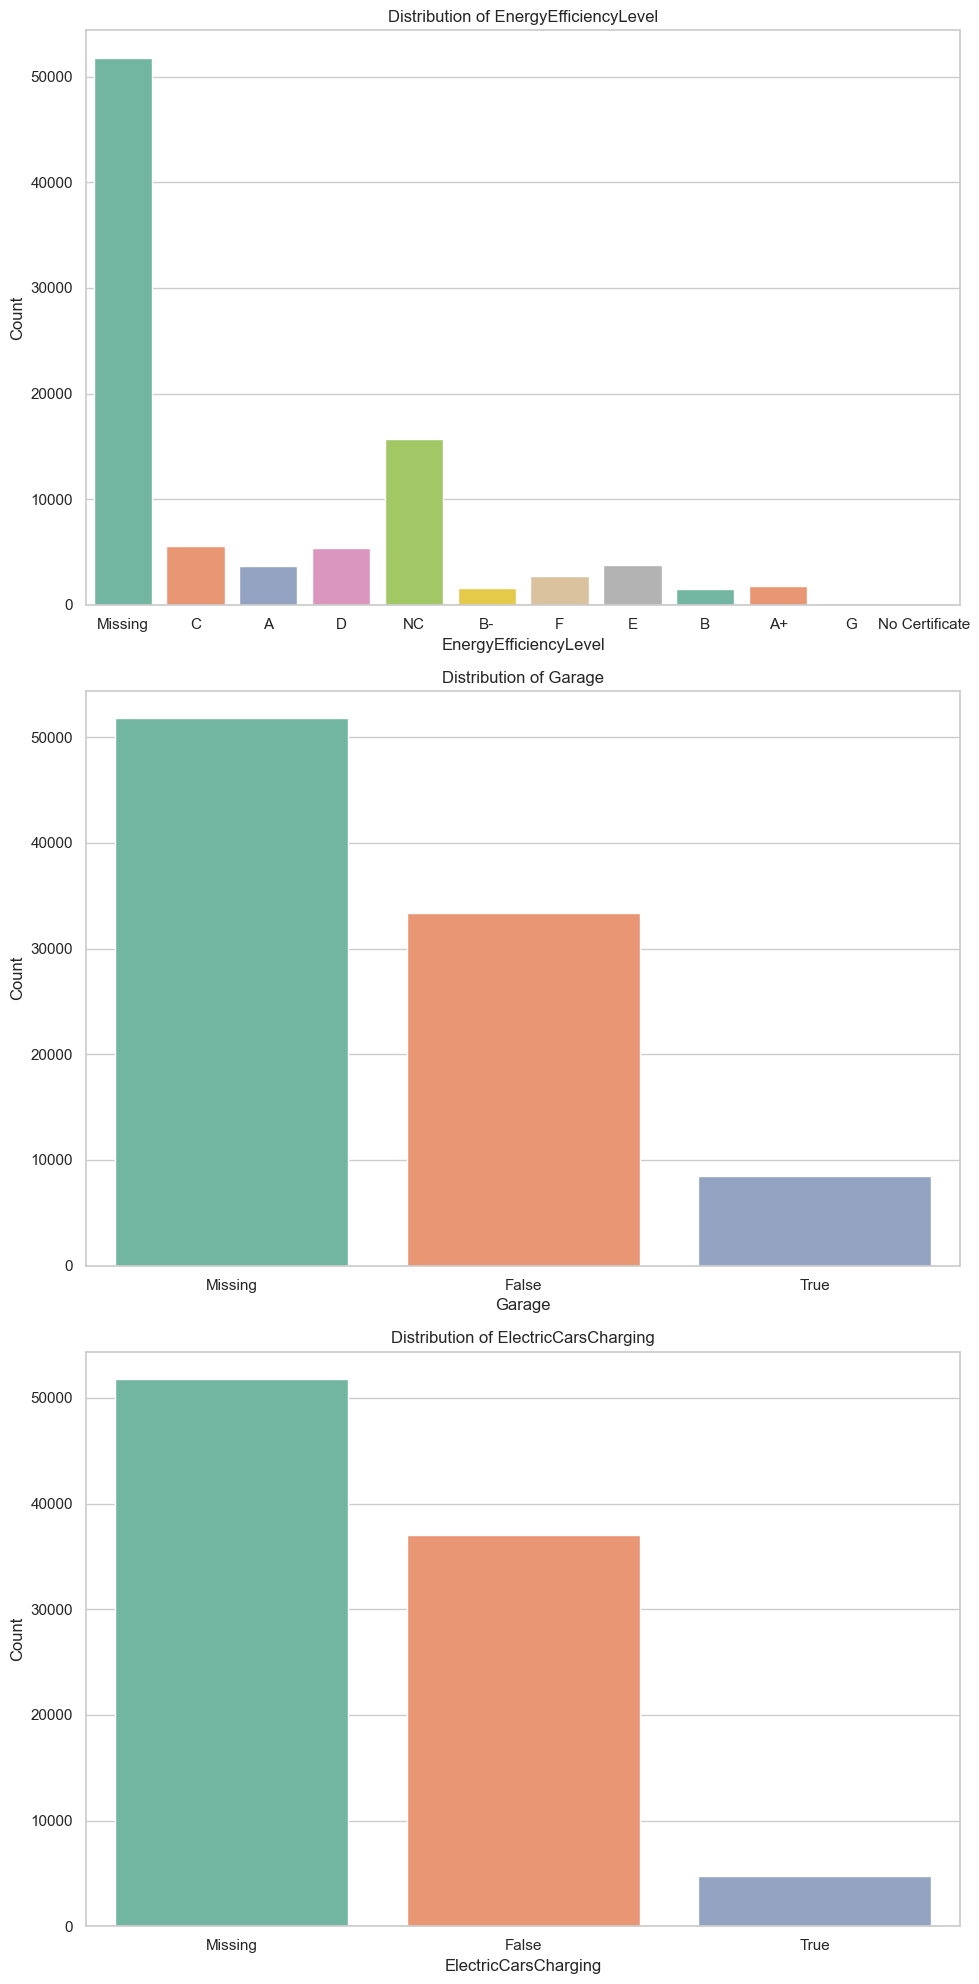

In [17]:
categorical_columns = [ 'EnergyEfficiencyLevel', 'Garage','ElectricCarsCharging']

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Set the plot style
sns.set(style="whitegrid")

# Create subplots to display multiple bar charts
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 20))

# Plot bar charts for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=X_train, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


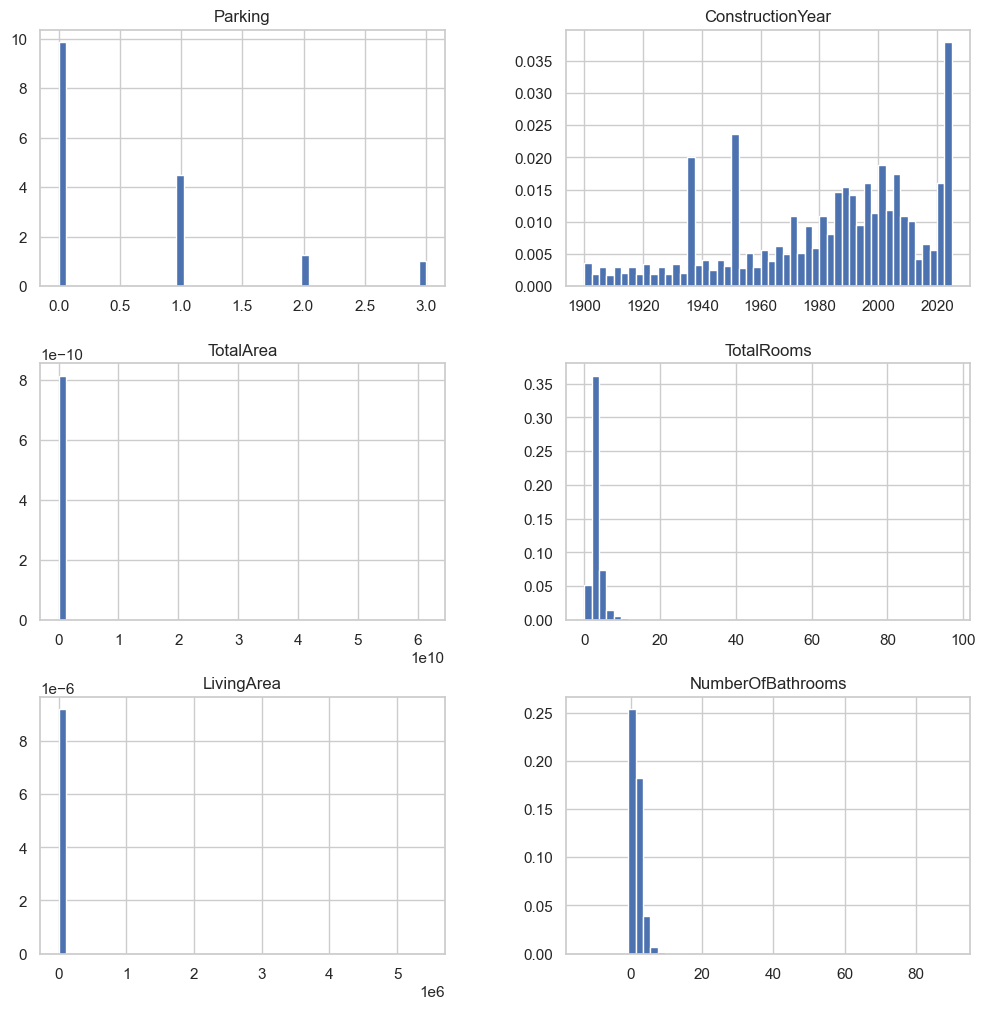

In [18]:
from matplotlib import pyplot as plt


X_train.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

In [19]:
df['NumberOfBathrooms'].describe()

count    123393.000000
mean          1.534358
std           1.737532
min         -13.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          90.000000
Name: NumberOfBathrooms, dtype: float64

In [20]:
df['TotalRooms'].describe()

count    71387.000000
mean         3.202390
std         10.639957
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max       2751.000000
Name: TotalRooms, dtype: float64

Outlier Detection

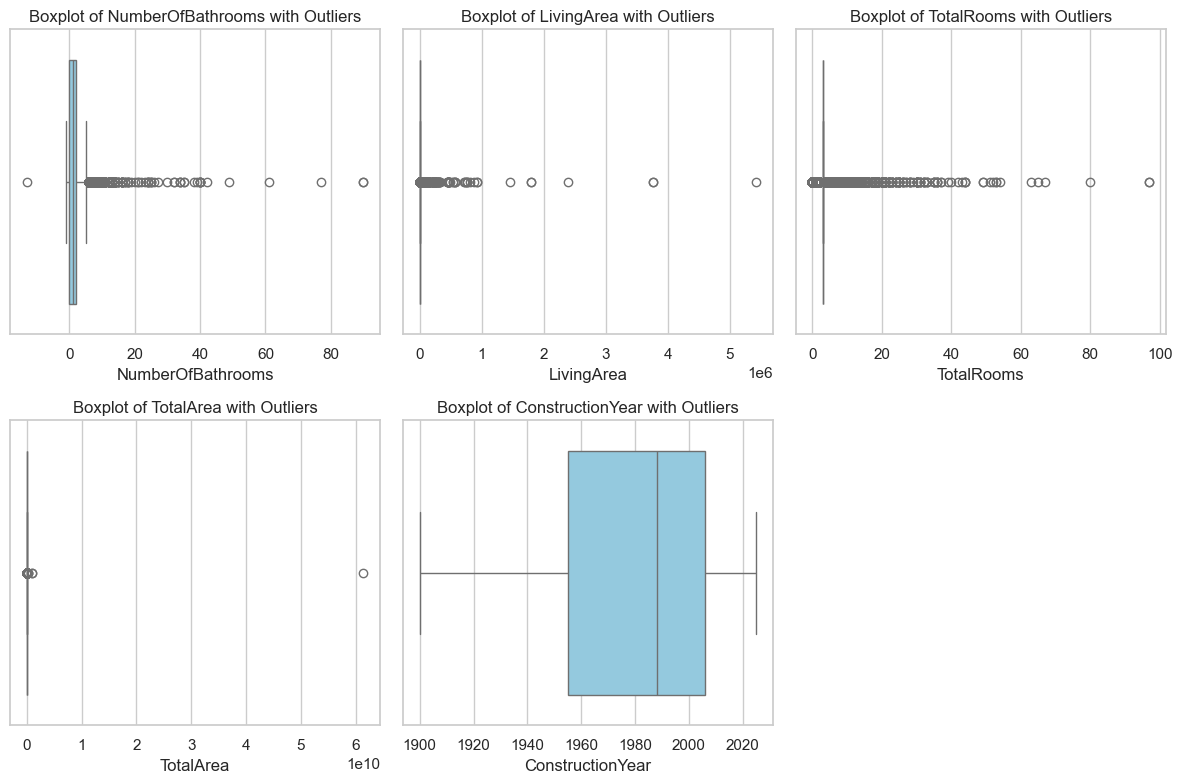

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
to_check_outliers = ['NumberOfBathrooms', 'LivingArea', 'TotalRooms', 'TotalArea', 'ConstructionYear']

# Set the plot style
sns.set(style="whitegrid")

# Create a figure for the box plots
plt.figure(figsize=(12, 8))

# Define custom bounds for the specified columns
custom_bounds = {
    'NumberOfBathrooms': (1, 15),  # Custom bounds: Lower = 1, Upper = 100
    'TotalRooms': (1, 25),  # Custom bounds: Lower = 1, Upper = 100
    'LivingArea': (0, 312),  # Custom bounds: Lower = 0, Upper = 312
    'TotalArea': (0, 1072),  # Custom bounds: Lower = 0, Upper = 1072
    'ConstructionYear': (1900, 2025)  # Custom bounds: Lower = 1900, Upper = 2025
}

# Loop through each column to create boxplot without any filtering
for i, column in enumerate(to_check_outliers):
    # Create a subplot for each column's boxplot
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=X_train[column], color='skyblue')

    # Set title and labels
    plt.title(f'Boxplot of {column} with Outliers')
    plt.xlabel(column)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [22]:
print("Before Capping:", X_train['NumberOfBathrooms'].describe())
print("Before Capping:", X_train['TotalRooms'].describe())



Before Capping: count    93582.000000
mean         1.613131
std          1.739054
min        -13.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         90.000000
Name: NumberOfBathrooms, dtype: float64
Before Capping: count    93582.000000
mean         3.098598
std          2.004204
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         97.000000
Name: TotalRooms, dtype: float64


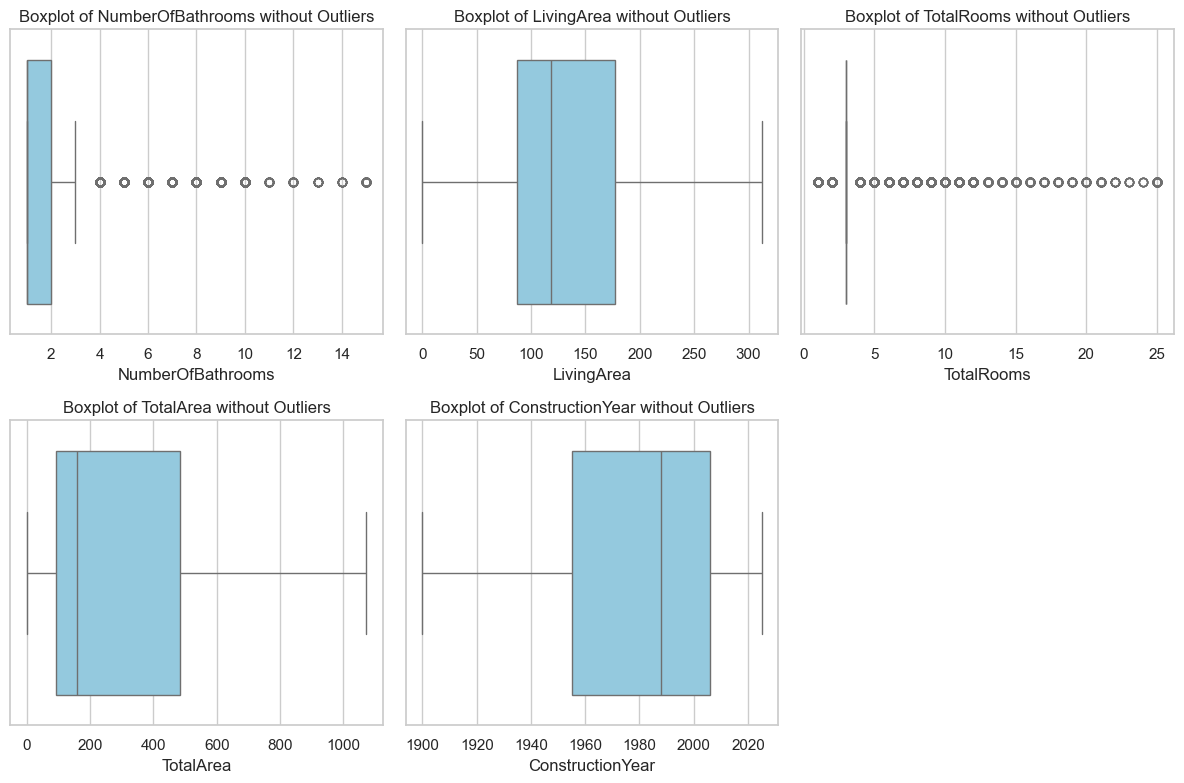

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to cap values using custom bounds
def cap_values_custom(column_data, lower_bound, upper_bound):
    return column_data.clip(lower=lower_bound, upper=upper_bound)

# Define custom bounds for the specified columns
custom_bounds = {
    'NumberOfBathrooms': (1, 15),  # Custom bounds: Lower = 1, Upper = 100
    'TotalRooms': (1, 25),  # Custom bounds: Lower = 1, Upper = 100
    'LivingArea': (0, 312),  # Custom bounds: Lower = 0, Upper = 312
    'TotalArea': (0, 1072),  # Custom bounds: Lower = 0, Upper = 1072
    'ConstructionYear': (1900, 2025)  # Custom bounds: Lower = 1900, Upper = 2025
}

# Apply custom capping for each column
for column in to_check_outliers:
    if column in custom_bounds:
        lower_bound, upper_bound = custom_bounds[column]
        X_train[column] = cap_values_custom(X_train[column], lower_bound, upper_bound)

# Set the plot style
sns.set(style="whitegrid")

# Create a figure for the box plots without outliers
plt.figure(figsize=(12, 8))

# Loop through each column to create boxplot after capping
for i, column in enumerate(to_check_outliers):
    # Create a subplot for each column's boxplot after capping
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=X_train[column], color='skyblue')

    # Set title and labels
    plt.title(f'Boxplot of {column} without Outliers')
    plt.xlabel(column)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


In [24]:
print("After Capping:", X_train['NumberOfBathrooms'].describe())
print("After Capping:", X_train['TotalRooms'].describe())


After Capping: count    93582.000000
mean         1.898399
std          1.330870
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: NumberOfBathrooms, dtype: float64
After Capping: count    93582.000000
mean         3.142730
std          1.741776
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max         25.000000
Name: TotalRooms, dtype: float64


Feature Extraction

In [25]:
print(X_train.columns.to_list())

['District', 'City', 'Town', 'Type', 'EnergyCertificate', 'Parking', 'ConstructionYear', 'TotalArea', 'EnergyEfficiencyLevel', 'Garage', 'Elevator', 'ElectricCarsCharging', 'TotalRooms', 'LivingArea', 'NumberOfBathrooms']


In [26]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from collections import defaultdict

# Define the columns
nominal = ['District', 'City', 'Town', 'Type', 'Garage', 'Elevator', 'ElectricCarsCharging']
ordinal = ['EnergyCertificate', 'EnergyEfficiencyLevel']

# Function for custom one-hot encoding with top 3 categories
def custom_one_hot_encode(df, column, top_n=3):
    top_categories = df[column].value_counts().nlargest(top_n).index  # Get top N categories
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'other')
    one_hot = pd.get_dummies(df[column], prefix=column, drop_first=False)
    return one_hot

# Encode nominal features (One-Hot Encoding) directly in X_train
for col in nominal:
    one_hot_encoded = custom_one_hot_encode(X_train, col)
    X_train = pd.concat([X_train.drop(columns=[col]), one_hot_encoded], axis=1)

# Define ordinal mapping correctly
ordinal_mapping = defaultdict(list)
ordinal_mapping['EnergyCertificate'] = ['NC', 'C', 'A', 'E', 'D', 'F', 'B-', 'A+', 'B', 'G', 'No Certificate']
ordinal_mapping['EnergyEfficiencyLevel'] = ['Missing', 'C', 'A', 'D', 'NC', 'B-', 'F', 'E', 'B', 'A+', 'G', 'No Certificate']

# Encode ordinal features (Ordinal Encoding) directly in X_train
for col in ordinal:
    encoder = OrdinalEncoder(categories=[ordinal_mapping[col]])
    X_train[col] = encoder.fit_transform(X_train[[col]])

# Identify columns that are still Boolean (True/False)
bool_columns = [col for col in X_train.columns if X_train[col].dtype == 'bool']

# Convert Boolean columns to 1/0
for col in bool_columns:
    X_train[col] = X_train[col].astype(int)

# Output the result
print("Encoded X_train:")
print(X_train.head())


Encoded X_train:
        EnergyCertificate  Parking  ConstructionYear  TotalArea  \
26718                 0.0      0.0            2017.0      155.0   
60222                 0.0      1.0            1997.0      112.0   
93519                 1.0      0.0            1950.0      264.0   
126748                2.0      1.0            1926.0       61.0   
40186                 3.0      2.0            2018.0      192.0   

        EnergyEfficiencyLevel  TotalRooms  LivingArea  NumberOfBathrooms  \
26718                     0.0         3.0       312.0                1.0   
60222                     0.0         3.0       112.0                2.0   
93519                     1.0         3.0       264.0                1.0   
126748                    2.0         3.0        55.0                1.0   
40186                     0.0         3.0       137.0                2.0   

        District_Lisboa  District_Porto  ...  Type_Land  Type_other  \
26718                 0               1  ...        

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))

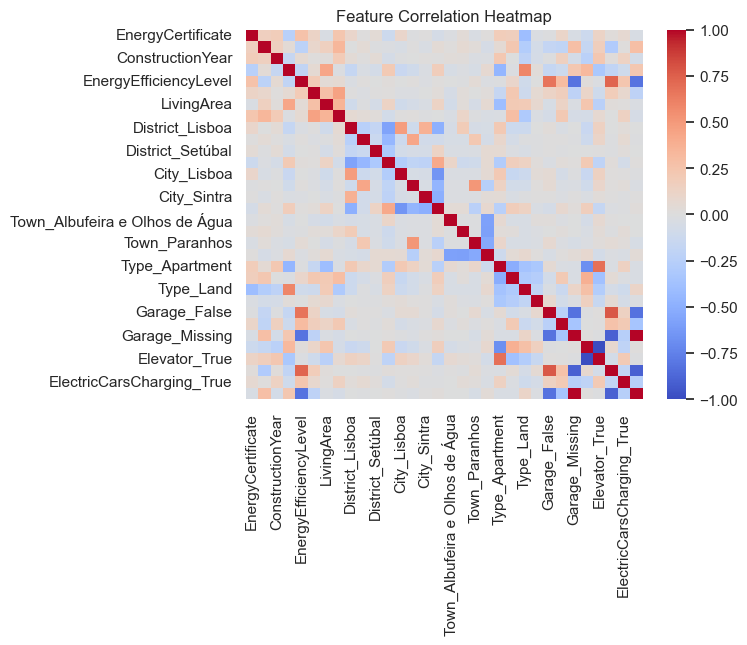

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train.corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


Explained Variance by Each Component: [0.95602873]
Total Variance Explained: 0.9560287279092231


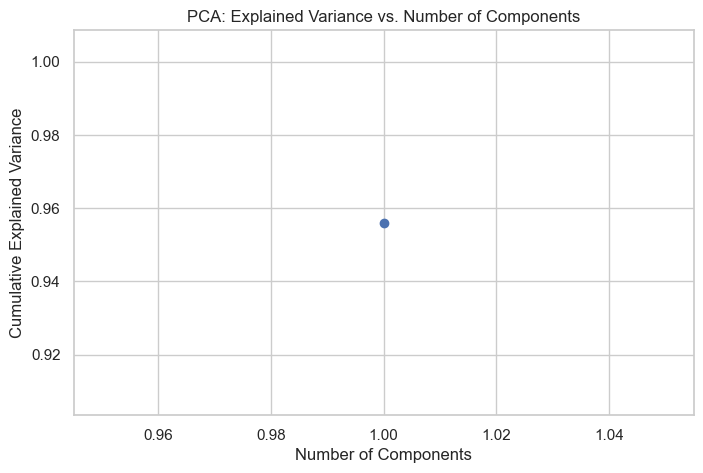

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Each Component:", explained_variance)
print("Total Variance Explained:", sum(explained_variance))

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Explained Variance vs. Number of Components')
plt.show()

